In [5]:
import pandas as pd

fama_french_filepath = 'C:/Users/tangy/Desktop/data/F-F_Research_Data_Factors.CSV'
msci_usa_filepath = 'C:/Users/tangy/Desktop/data/MSCI USA index.CSV'
msci_usa_value_filepath = 'C:/Users/tangy/Desktop/data/MSCI USA value index.CSV'
msci_usa_min_vol_filepath = 'C:/Users/tangy/Desktop/data/MSCI USA minimum volatility index.CSV'
msci_usa_equal_weighted_filepath = 'C:/Users/tangy/Desktop/data/MSCI USA equal-weighted index.CSV'
msci_usa_momentum_filepath = 'C:/Users/tangy/Desktop/data/MSCI USA momentum index.CSV'

fama_french_data = pd.read_csv(fama_french_filepath)
msci_usa_data = pd.read_csv(msci_usa_filepath)
msci_usa_value_data = pd.read_csv(msci_usa_value_filepath)
msci_usa_min_vol_data = pd.read_csv(msci_usa_min_vol_filepath)
msci_usa_equal_weighted_data = pd.read_csv(msci_usa_equal_weighted_filepath)
msci_usa_momentum_data = pd.read_csv(msci_usa_momentum_filepath)

print("Fama-French Data:")
print(fama_french_data.head())
print("\nMSCI USA Data:")
print(msci_usa_data.head())
print("\nMSCI USA Value Data:")
print(msci_usa_value_data.head())
print("\nMSCI USA Minimum Volatility Data:")
print(msci_usa_min_vol_data.head())
print("\nMSCI USA Equal-Weighted Data:")
print(msci_usa_equal_weighted_data.head())
print("\nMSCI USA Momentum Data:")
print(msci_usa_momentum_data.head())


Fama-French Data:
   Unnamed: 0  Mkt-RF   SMB   HML    RF
0      192607    2.96 -2.56 -2.43  0.22
1      192608    2.64 -1.17  3.82  0.25
2      192609    0.36 -1.40  0.13  0.23
3      192610   -3.24 -0.09  0.70  0.32
4      192611    2.53 -0.10 -0.51  0.31

MSCI USA Data:
        Date USA Standard (Large+Mid Cap)
0  31-Jan-95                      442.209
1  28-Feb-95                      458.693
2  31-Mar-95                      470.035
3  28-Apr-95                      483.842
4  31-May-95                      501.775

MSCI USA Value Data:
        Date USA VALUE Standard (Large+Mid Cap)
0  31-Jan-95                            613.312
1  28-Feb-95                            636.999
2  31-Mar-95                            651.991
3  28-Apr-95                            672.687
4  31-May-95                            698.397

MSCI USA Minimum Volatility Data:
        Date USA MINIMUM VOLATILITY (USD) Standard (Large+Mid Cap)
0  31-Jan-95                                            439.60

In [6]:
def convert_msci_date(date_str):
    if isinstance(date_str, str):
        return datetime.strptime(date_str, '%d-%b-%y').strftime('%Y%m')
    else:
        return 'Unknown'

msci_usa_data['Date'] = msci_usa_data['Date'].apply(convert_msci_date)
msci_usa_value_data['Date'] = msci_usa_value_data['Date'].apply(convert_msci_date)

In [9]:
def calculate_monthly_returns(df, value_column):
    df[value_column] = pd.to_numeric(df[value_column], errors='coerce')
    df['Monthly_Return'] = df[value_column].pct_change() * 100
    return df

msci_usa_data = calculate_monthly_returns(msci_usa_data, 'USA Standard (Large+Mid Cap)')
msci_usa_value_data = calculate_monthly_returns(msci_usa_value_data, 'USA VALUE Standard (Large+Mid Cap)')
msci_usa_min_vol_data = calculate_monthly_returns(msci_usa_min_vol_data, 'USA MINIMUM VOLATILITY (USD) Standard (Large+Mid Cap)')
msci_usa_equal_weighted_data = calculate_monthly_returns(msci_usa_equal_weighted_data, 'USA EQUAL WEIGHTED Standard (Large+Mid Cap)')
msci_usa_momentum_data = calculate_monthly_returns(msci_usa_momentum_data, 'USA MOMENTUM Standard (Large+Mid Cap)')

print(msci_usa_data.head())


     Date  USA Standard (Large+Mid Cap)  Monthly_Return
0  199501                       442.209             NaN
1  199502                       458.693        3.727649
2  199503                       470.035        2.472678
3  199504                       483.842        2.937441
4  199505                       501.775        3.706375


In [14]:
def convert_msci_date(date_str):
    if isinstance(date_str, str):
        try:
            return datetime.strptime(date_str, '%d-%b-%y').strftime('%Y%m')
        except ValueError:
            return date_str 
    else:
        return date_str

msci_usa_data['Date'] = msci_usa_data['Date'].apply(convert_msci_date)
msci_usa_value_data['Date'] = msci_usa_value_data['Date'].apply(convert_msci_date)
msci_usa_min_vol_data['Date'] = msci_usa_min_vol_data['Date'].apply(convert_msci_date)
msci_usa_equal_weighted_data['Date'] = msci_usa_equal_weighted_data['Date'].apply(convert_msci_date)
msci_usa_momentum_data['Date'] = msci_usa_momentum_data['Date'].apply(convert_msci_date)

msci_usa_data['Date'] = msci_usa_data['Date'].astype(int)
msci_usa_value_data['Date'] = msci_usa_value_data['Date'].astype(int)
msci_usa_min_vol_data['Date'] = msci_usa_min_vol_data['Date'].astype(int)
msci_usa_equal_weighted_data['Date'] = msci_usa_equal_weighted_data['Date'].astype(int)
msci_usa_momentum_data['Date'] = msci_usa_momentum_data['Date'].astype(int)



In [15]:
msci_usa_data['Date'] = msci_usa_data['Date'].astype(int)
msci_usa_value_data['Date'] = msci_usa_value_data['Date'].astype(int)
msci_usa_min_vol_data['Date'] = msci_usa_min_vol_data['Date'].astype(int)
msci_usa_equal_weighted_data['Date'] = msci_usa_equal_weighted_data['Date'].astype(int)
msci_usa_momentum_data['Date'] = msci_usa_momentum_data['Date'].astype(int)

msci_usa_data = msci_usa_data[(msci_usa_data['Date'] >= start_date) & (msci_usa_data['Date'] <= end_date)]
msci_usa_value_data = msci_usa_value_data[(msci_usa_value_data['Date'] >= start_date) & (msci_usa_value_data['Date'] <= end_date)]
msci_usa_min_vol_data = msci_usa_min_vol_data[(msci_usa_min_vol_data['Date'] >= start_date) & (msci_usa_min_vol_data['Date'] <= end_date)]
msci_usa_equal_weighted_data = msci_usa_equal_weighted_data[(msci_usa_equal_weighted_data['Date'] >= start_date) & (msci_usa_equal_weighted_data['Date'] <= end_date)]
msci_usa_momentum_data = msci_usa_momentum_data[(msci_usa_momentum_data['Date'] >= start_date) & (msci_usa_momentum_data['Date'] <= end_date)]



In [16]:
import pandas as pd


start_date = 199501
end_date = 202307

msci_usa_data = msci_usa_data[(msci_usa_data['Date'] >= start_date) & (msci_usa_data['Date'] <= end_date)]
msci_usa_value_data = msci_usa_value_data[(msci_usa_value_data['Date'] >= start_date) & (msci_usa_value_data['Date'] <= end_date)]
msci_usa_min_vol_data = msci_usa_min_vol_data[(msci_usa_min_vol_data['Date'] >= start_date) & (msci_usa_min_vol_data['Date'] <= end_date)]
msci_usa_equal_weighted_data = msci_usa_equal_weighted_data[(msci_usa_equal_weighted_data['Date'] >= start_date) & (msci_usa_equal_weighted_data['Date'] <= end_date)]
msci_usa_momentum_data = msci_usa_momentum_data[(msci_usa_momentum_data['Date'] >= start_date) & (msci_usa_momentum_data['Date'] <= end_date)]

# Risk-free rate from Fama-French dataset
fama_french_data = fama_french_data[(fama_french_data['Unnamed: 0'] >= start_date) & (fama_french_data['Unnamed: 0'] <= end_date)]
risk_free_rate = fama_french_data['RF'].mean() / 100  # Converting to decimal

# Function to calculate annualized return and Sharpe Ratio
def calculate_metrics(df):
    avg_monthly_return = df['Monthly_Return'].mean()
    annualized_return = (1 + avg_monthly_return / 100)**12 - 1  # Annualized Return
    annualized_volatility = df['Monthly_Return'].std() * (12**0.5)  # Annual Volatility
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility  # Sharpe Ratio

    return annualized_return, sharpe_ratio

metrics = {
    "MSCI USA": calculate_metrics(msci_usa_data),
    "MSCI USA Value": calculate_metrics(msci_usa_value_data),
    "MSCI USA Min Vol": calculate_metrics(msci_usa_min_vol_data),
    "MSCI USA Equal Weighted": calculate_metrics(msci_usa_equal_weighted_data),
    "MSCI USA Momentum": calculate_metrics(msci_usa_momentum_data)
}

metrics_df = pd.DataFrame(metrics, index=["Annualized Return", "Sharpe Ratio"]).T
print(metrics_df)



                         Annualized Return  Sharpe Ratio
MSCI USA                          0.031973      0.003952
MSCI USA Value                    0.018364      0.003369
MSCI USA Min Vol                  0.031647      0.004093
MSCI USA Equal Weighted           0.026023      0.003006
MSCI USA Momentum                 0.075122      0.005610


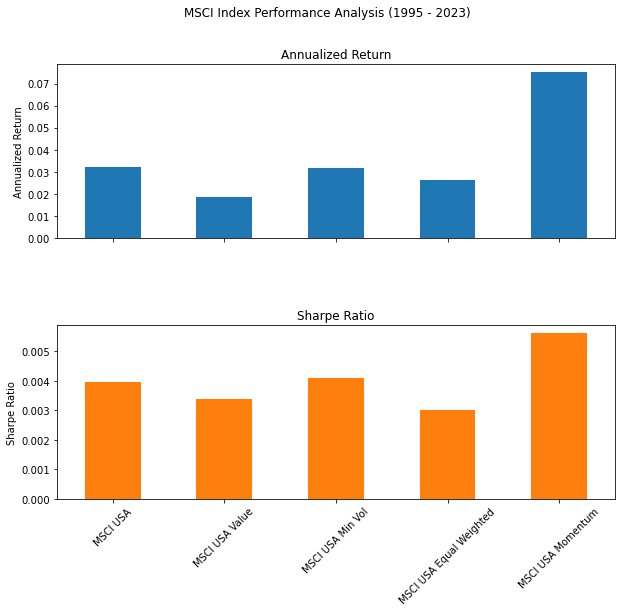

In [17]:
import matplotlib.pyplot as plt

metrics_df.plot(kind='bar', subplots=True, layout=(2, 1), figsize=(10, 8), legend=False)

plt.subplots_adjust(hspace=0.5)
plt.suptitle('MSCI Index Performance Analysis (1995 - 2023)')

plt.subplot(2, 1, 1)
plt.ylabel('Annualized Return')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)

plt.show()


In [18]:
msci_multi_factor = (msci_usa_value_data['Monthly_Return'] + 
                     msci_usa_min_vol_data['Monthly_Return'] + 
                     msci_usa_equal_weighted_data['Monthly_Return'] + 
                     msci_usa_momentum_data['Monthly_Return']) / 4

msci_multi_factor_data = pd.DataFrame({'Date': msci_usa_value_data['Date'], 'Monthly_Return': msci_multi_factor})

multi_factor_metrics = calculate_metrics(msci_multi_factor_data)

metrics_df.loc['MSCI Multi-Factor'] = multi_factor_metrics

print(metrics_df)


                         Annualized Return  Sharpe Ratio
MSCI USA                          0.031973      0.003952
MSCI USA Value                    0.018364      0.003369
MSCI USA Min Vol                  0.031647      0.004093
MSCI USA Equal Weighted           0.026023      0.003006
MSCI USA Momentum                 0.075122      0.005610
MSCI Multi-Factor                 0.037577      0.005299
